In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

%matplotlib inline
sns.set(style='white')
colors = [['black', 'darkgreen', 'maroon', 'darkorange', 'darkblue', 'steelblue'],
          ['black', 'darkgreen', 'maroon', 'steelblue', 'darkblue', 'darkorange', 'purple'],
          ['darkgreen', 'maroon', 'darkblue']]

In [2]:
# Loading the data

dataset_3 = pd.read_csv('data/cluster_ds3.csv',
                  header=0,
                  index_col=None)

dataset_4 = pd.read_csv('data/cluster_ds4.csv',
                  header=0,
                  index_col=None)

dataset_5 = pd.read_csv('data/cluster_ds5.csv',
                  header=0,
                  index_col=None)

In [3]:
# Function to plot

def plot_scatter(df, colors):
    fig = plt.figure(figsize=[10, 7])
    s = sns.scatterplot(x='x',
                        y='y',
                        data=df,
                        hue='class',
                        legend='full',
                        palette=colors,
                        s=60,
                        alpha=0.9)
    l = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
    plt.close()

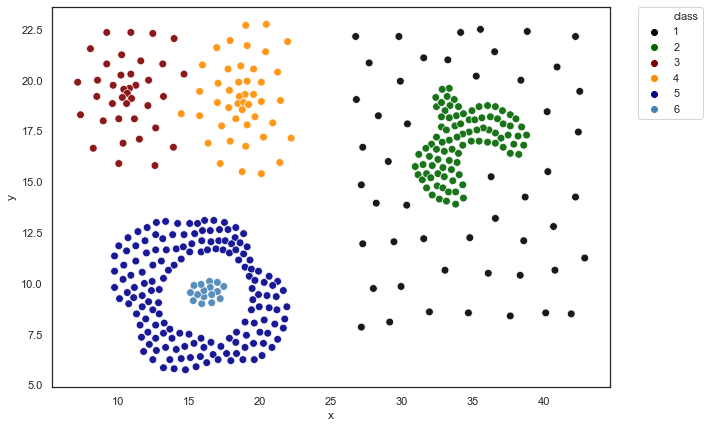

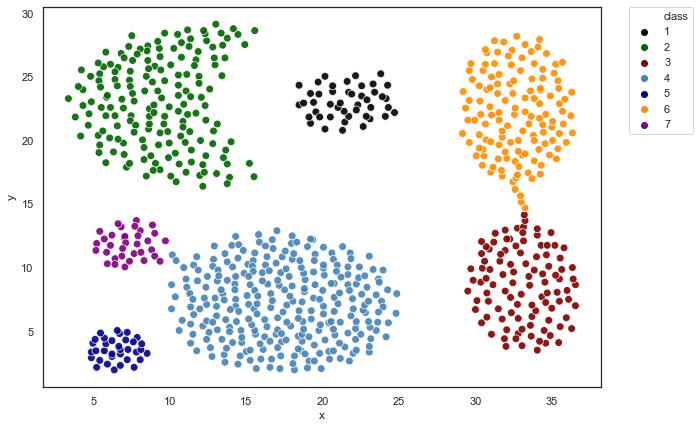

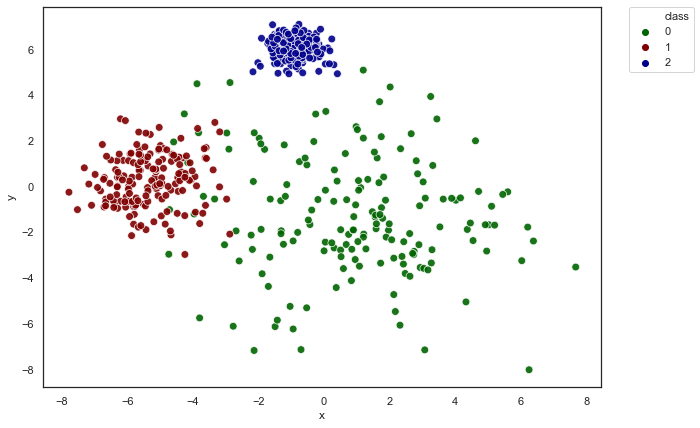

In [4]:
# Original clusters

plot_scatter(dataset_3, colors[0])
plot_scatter(dataset_4, colors[1])
plot_scatter(dataset_5, colors[2])

In [5]:
# Clustering